In [182]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [5]:
Data_Frame = pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")
Data_Frame

MONATSZAHL              AUSPRÄGUNG  JAHR   MONAT     WERT  \
0      Alkoholunfälle               insgesamt  2022  202201      NaN   
1      Alkoholunfälle               insgesamt  2022  202202      NaN   
2      Alkoholunfälle               insgesamt  2022  202203      NaN   
3      Alkoholunfälle               insgesamt  2022  202204      NaN   
4      Alkoholunfälle               insgesamt  2022  202205      NaN   
5      Alkoholunfälle               insgesamt  2022  202206      NaN   
6      Alkoholunfälle               insgesamt  2022  202207      NaN   
7      Alkoholunfälle               insgesamt  2022  202208      NaN   
8      Alkoholunfälle               insgesamt  2022  202209      NaN   
9      Alkoholunfälle               insgesamt  2022  202210      NaN   
10     Alkoholunfälle               insgesamt  2022  202211      NaN   
11     Alkoholunfälle               insgesamt  2022  202212      NaN   
12     Alkoholunfälle               insgesamt  2021   Summe    383.0   
13     Alkoholunfälle               insgesamt  2021  202101     16.0   
14     Alkoholunfälle               insgesamt  2021  202102     14.0   
15     Alkoholunfälle               insgesamt  2021  202103     24.0   
16     Alkoholunfälle               insgesamt  2021  202104     16.0   
17     Alkoholunfälle               insgesamt  2021  202105     24.0   
18     Alkoholunfälle               insgesamt  2021  202106     48.0   
19     Alkoholunfälle               insgesamt  2021  202107     44.0   
20     Alkoholunfälle               insgesamt  2021  202108     46.0   
21     Alkoholunfälle               insgesamt  2021  202109     54.0   
22     Alkoholunfälle               insgesamt  2021  202110     43.0   
23     Alkoholunfälle               insgesamt  2021  202111     33.0   
24     Alkoholunfälle               insgesamt  2021  202112     21.0   
25     Alkoholunfälle               insgesamt  2020   Summe    430.0   
26     Alkoholunfälle               insgesamt  2020  202001     28.0   
27     Alkoholunfälle               insgesamt  2020  202002     40.0   
28     Alkoholunfälle               insgesamt  2020  202003     27.0   
29     Alkoholunfälle               insgesamt  2020  202004     26.0   
30     Alkoholunfälle               insgesamt  2020  202005     40.0   
31     Alkoholunfälle               insgesamt  2020  202006     49.0   
32     Alkoholunfälle               insgesamt  2020  202007     58.0   
33     Alkoholunfälle               insgesamt  2020  202008     46.0   
34     Alkoholunfälle               insgesamt  2020  202009     46.0   
35     Alkoholunfälle               insgesamt  2020  202010     34.0   
36     Alkoholunfälle               insgesamt  2020  202011     23.0   
37     Alkoholunfälle               insgesamt  2020  202012     13.0   
38     Alkoholunfälle               insgesamt  2019   Summe    434.0   
39     Alkoholunfälle               insgesamt  2019  201901     22.0   
40     Alkoholunfälle               insgesamt  2019  201902     28.0   
41     Alkoholunfälle               insgesamt  2019  201903     34.0   
42     Alkoholunfälle               insgesamt  2019  201904     36.0   
43     Alkoholunfälle               insgesamt  2019  201905     39.0   
44     Alkoholunfälle               insgesamt  2019  201906     40.0   
45     Alkoholunfälle               insgesamt  2019  201907     48.0   
46     Alkoholunfälle               insgesamt  2019  201908     31.0   
47     Alkoholunfälle               insgesamt  2019  201909     47.0   
48     Alkoholunfälle               insgesamt  2019  201910     45.0   
49     Alkoholunfälle               insgesamt  2019  201911     29.0   
50     Alkoholunfälle               insgesamt  2019  201912     35.0   
51     Alkoholunfälle               insgesamt  2018   Summe    398.0   
52     Alkoholunfälle               insgesamt  2018  201801     22.0   
53     Alkoholunfälle               insgesamt  2018  201802     24.0   
54     Alkoholunfälle               insgesamt  2018

In [6]:
Data_Frame = Data_Frame.iloc[:,:5]
Data_Frame

MONATSZAHL              AUSPRÄGUNG  JAHR   MONAT     WERT
0      Alkoholunfälle               insgesamt  2022  202201      NaN
1      Alkoholunfälle               insgesamt  2022  202202      NaN
2      Alkoholunfälle               insgesamt  2022  202203      NaN
3      Alkoholunfälle               insgesamt  2022  202204      NaN
4      Alkoholunfälle               insgesamt  2022  202205      NaN
5      Alkoholunfälle               insgesamt  2022  202206      NaN
6      Alkoholunfälle               insgesamt  2022  202207      NaN
7      Alkoholunfälle               insgesamt  2022  202208      NaN
8      Alkoholunfälle               insgesamt  2022  202209      NaN
9      Alkoholunfälle               insgesamt  2022  202210      NaN
10     Alkoholunfälle               insgesamt  2022  202211      NaN
11     Alkoholunfälle               insgesamt  2022  202212      NaN
12     Alkoholunfälle               insgesamt  2021   Summe    383.0
13     Alkoholunfälle               insgesamt  2021  202101     16.0
14     Alkoholunfälle               insgesamt  2021  202102     14.0
15     Alkoholunfälle               insgesamt  2021  202103     24.0
16     Alkoholunfälle               insgesamt  2021  202104     16.0
17     Alkoholunfälle               insgesamt  2021  202105     24.0
18     Alkoholunfälle               insgesamt  2021  202106     48.0
19     Alkoholunfälle               insgesamt  2021  202107     44.0
20     Alkoholunfälle               insgesamt  2021  202108     46.0
21     Alkoholunfälle               insgesamt  2021  202109     54.0
22     Alkoholunfälle               insgesamt  2021  202110     43.0
23     Alkoholunfälle               insgesamt  2021  202111     33.0
24     Alkoholunfälle               insgesamt  2021  202112     21.0
25     Alkoholunfälle               insgesamt  2020   Summe    430.0
26     Alkoholunfälle               insgesamt  2020  202001     28.0
27     Alkoholunfälle               insgesamt  2020  202002     40.0
28     Alkoholunfälle               insgesamt  2020  202003     27.0
29     Alkoholunfälle               insgesamt  2020  202004     26.0
30     Alkoholunfälle               insgesamt  2020  202005     40.0
31     Alkoholunfälle               insgesamt  2020  202006     49.0
32     Alkoholunfälle               insgesamt  2020  202007     58.0
33     Alkoholunfälle               insgesamt  2020  202008     46.0
34     Alkoholunfälle               insgesamt  2020  202009     46.0
35     Alkoholunfälle               insgesamt  2020  202010     34.0
36     Alkoholunfälle               insgesamt  2020  202011     23.0
37     Alkoholunfälle               insgesamt  2020  202012     13.0
38     Alkoholunfälle               insgesamt  2019   Summe    434.0
39     Alkoholunfälle               insgesamt  2019  201901     22.0
40     Alkoholunfälle               insgesamt  2019  201902     28.0
41     Alkoholunfälle               insgesamt  2019  201903     34.0
42     Alkoholunfälle               insgesamt  2019  201904     36.0
43     Alkoholunfälle               insgesamt  2019  201905     39.0
44     Alkoholunfälle               insgesamt  2019  201906     40.0
45     Alkoholunfälle               insgesamt  2019  201907     48.0
46     Alkoholunfälle               insgesamt  2019  201908     31.0
47     Alkoholunfälle               insgesamt  2019  201909     47.0
48     Alkoholunfälle               insgesamt  2019  201910     45.0
49     Alkoholunfälle               insgesamt  2019  201911     29.0
50     Alkoholunfälle               insgesamt  2019  201912     35.0
51     Alkoholunfälle               insgesamt  2018   Summe    398.0
52     Alkoholunfälle               insgesamt  2018  201801     22.0
53     Alkoholunfälle               insgesamt  2018  201802     24.0
54     Alkoholunfälle               insgesamt  2018  201803     32.0
55     Alkoholunfälle               insgesamt  2018  201804     25.0
56     Alkoholunfälle               insgesamt  2018  201805     34.0
57     Al

In [7]:
# Rename the columns we will be working on 
Data_Frame = Data_Frame.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRÄGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

In [8]:
Data_Frame

Category           Accident_Type  Year   Month    Value
0      Alkoholunfälle               insgesamt  2022  202201      NaN
1      Alkoholunfälle               insgesamt  2022  202202      NaN
2      Alkoholunfälle               insgesamt  2022  202203      NaN
3      Alkoholunfälle               insgesamt  2022  202204      NaN
4      Alkoholunfälle               insgesamt  2022  202205      NaN
5      Alkoholunfälle               insgesamt  2022  202206      NaN
6      Alkoholunfälle               insgesamt  2022  202207      NaN
7      Alkoholunfälle               insgesamt  2022  202208      NaN
8      Alkoholunfälle               insgesamt  2022  202209      NaN
9      Alkoholunfälle               insgesamt  2022  202210      NaN
10     Alkoholunfälle               insgesamt  2022  202211      NaN
11     Alkoholunfälle               insgesamt  2022  202212      NaN
12     Alkoholunfälle               insgesamt  2021   Summe    383.0
13     Alkoholunfälle               insgesamt  2021  202101     16.0
14     Alkoholunfälle               insgesamt  2021  202102     14.0
15     Alkoholunfälle               insgesamt  2021  202103     24.0
16     Alkoholunfälle               insgesamt  2021  202104     16.0
17     Alkoholunfälle               insgesamt  2021  202105     24.0
18     Alkoholunfälle               insgesamt  2021  202106     48.0
19     Alkoholunfälle               insgesamt  2021  202107     44.0
20     Alkoholunfälle               insgesamt  2021  202108     46.0
21     Alkoholunfälle               insgesamt  2021  202109     54.0
22     Alkoholunfälle               insgesamt  2021  202110     43.0
23     Alkoholunfälle               insgesamt  2021  202111     33.0
24     Alkoholunfälle               insgesamt  2021  202112     21.0
25     Alkoholunfälle               insgesamt  2020   Summe    430.0
26     Alkoholunfälle               insgesamt  2020  202001     28.0
27     Alkoholunfälle               insgesamt  2020  202002     40.0
28     Alkoholunfälle               insgesamt  2020  202003     27.0
29     Alkoholunfälle               insgesamt  2020  202004     26.0
30     Alkoholunfälle               insgesamt  2020  202005     40.0
31     Alkoholunfälle               insgesamt  2020  202006     49.0
32     Alkoholunfälle               insgesamt  2020  202007     58.0
33     Alkoholunfälle               insgesamt  2020  202008     46.0
34     Alkoholunfälle               insgesamt  2020  202009     46.0
35     Alkoholunfälle               insgesamt  2020  202010     34.0
36     Alkoholunfälle               insgesamt  2020  202011     23.0
37     Alkoholunfälle               insgesamt  2020  202012     13.0
38     Alkoholunfälle               insgesamt  2019   Summe    434.0
39     Alkoholunfälle               insgesamt  2019  201901     22.0
40     Alkoholunfälle               insgesamt  2019  201902     28.0
41     Alkoholunfälle               insgesamt  2019  201903     34.0
42     Alkoholunfälle               insgesamt  2019  201904     36.0
43     Alkoholunfälle               insgesamt  2019  201905     39.0
44     Alkoholunfälle               insgesamt  2019  201906     40.0
45     Alkoholunfälle               insgesamt  2019  201907     48.0
46     Alkoholunfälle               insgesamt  2019  201908     31.0
47     Alkoholunfälle               insgesamt  2019  201909     47.0
48     Alkoholunfälle               insgesamt  2019  201910     45.0
49     Alkoholunfälle               insgesamt  2019  201911     29.0
50     Alkoholunfälle               insgesamt  2019  201912     35.0
51     Alkoholunfälle               insgesamt  2018   Summe    398.0
52     Alkoholunfälle               insgesamt  2018  201801     22.0
53     Alkoholunfälle               insgesamt  2018  201802     24.0
54     Alkoholunfälle               insgesamt  2018  201803     32.0
55     Alkoholunfälle               insgesamt  2018  201804     25.0
56     Alkoholunfälle               insgesamt  2018  201805     34.0
57     Alko

In [9]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       2086 non-null   object 
 1   Accident_Type  2086 non-null   object 
 2   Year           2086 non-null   int64  
 3   Month          2086 non-null   object 
 4   Value          2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


In [10]:
Data_Frame.describe()

Year         Value
count  2086.000000   2002.000000
mean   2010.963087   1434.433566
std       6.615227   4634.494223
min    2000.000000      0.000000
25%    2005.000000     41.000000
50%    2011.000000    394.000000
75%    2017.000000    863.250000
max    2022.000000  46988.000000

In [11]:
for col in Data_Frame.columns:
    if Data_Frame[col].dtype == 'object':
        print(Data_Frame[col].value_counts())

Verkehrsunfälle    894
Alkoholunfälle     596
Fluchtunfälle      596
Name: Category, dtype: int64
insgesamt                 894
Verletzte und Getötete    894
mit Personenschäden       298
Name: Accident_Type, dtype: int64
Summe     154
201812      7
200109      7
202201      7
201710      7
201909      7
200906      7
201208      7
200007      7
201101      7
200003      7
201504      7
201106      7
200609      7
201608      7
202105      7
202010      7
200202      7
200810      7
202106      7
201012      7
201707      7
201806      7
201311      7
201601      7
200501      7
201708      7
201201      7
200305      7
201401      7
200707      7
200312      7
201501      7
200712      7
200212      7
202009      7
200511      7
201502      7
201203      7
201207      7
200011      7
201411      7
200304      7
200308      7
200408      7
202212      7
200405      7
202006      7
200601      7
201406      7
201509      7
200607      7
200101      7
201510      7
200506      7
202005  

In [12]:
Data_Frame.isnull().sum()

Category          0
Accident_Type     0
Year              0
Month             0
Value            84
dtype: int64

In [13]:
# Identifier les lignes avec NaN
rows_with_nan = Data_Frame[Data_Frame.isnull().any(axis=1)]

# Afficher les lignes avec NaN
print(rows_with_nan)

             Category           Accident_Type  Year   Month  Value
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
5      Alkoholunfälle               insgesamt  2022  202206    NaN
6      Alkoholunfälle               insgesamt  2022  202207    NaN
7      Alkoholunfälle               insgesamt  2022  202208    NaN
8      Alkoholunfälle               insgesamt  2022  202209    NaN
9      Alkoholunfälle               insgesamt  2022  202210    NaN
10     Alkoholunfälle               insgesamt  2022  202211    NaN
11     Alkoholunfälle               insgesamt  2022  202212    NaN
298    Alkoholunfälle  Verletzte und Getötete  2022  202201    NaN
299    Alkoholunfälle  Verletzte und Getötete  2022  202202   

Only the value of 2022 are missing

In [14]:
# without 2021 and 2022
Data_Frame_2020 = Data_Frame.drop(Data_Frame[Data_Frame['Year'] > 2020].index)
Data_Frame_2020

Category           Accident_Type  Year   Month    Value
25     Alkoholunfälle               insgesamt  2020   Summe    430.0
26     Alkoholunfälle               insgesamt  2020  202001     28.0
27     Alkoholunfälle               insgesamt  2020  202002     40.0
28     Alkoholunfälle               insgesamt  2020  202003     27.0
29     Alkoholunfälle               insgesamt  2020  202004     26.0
30     Alkoholunfälle               insgesamt  2020  202005     40.0
31     Alkoholunfälle               insgesamt  2020  202006     49.0
32     Alkoholunfälle               insgesamt  2020  202007     58.0
33     Alkoholunfälle               insgesamt  2020  202008     46.0
34     Alkoholunfälle               insgesamt  2020  202009     46.0
35     Alkoholunfälle               insgesamt  2020  202010     34.0
36     Alkoholunfälle               insgesamt  2020  202011     23.0
37     Alkoholunfälle               insgesamt  2020  202012     13.0
38     Alkoholunfälle               insgesamt  2019   Summe    434.0
39     Alkoholunfälle               insgesamt  2019  201901     22.0
40     Alkoholunfälle               insgesamt  2019  201902     28.0
41     Alkoholunfälle               insgesamt  2019  201903     34.0
42     Alkoholunfälle               insgesamt  2019  201904     36.0
43     Alkoholunfälle               insgesamt  2019  201905     39.0
44     Alkoholunfälle               insgesamt  2019  201906     40.0
45     Alkoholunfälle               insgesamt  2019  201907     48.0
46     Alkoholunfälle               insgesamt  2019  201908     31.0
47     Alkoholunfälle               insgesamt  2019  201909     47.0
48     Alkoholunfälle               insgesamt  2019  201910     45.0
49     Alkoholunfälle               insgesamt  2019  201911     29.0
50     Alkoholunfälle               insgesamt  2019  201912     35.0
51     Alkoholunfälle               insgesamt  2018   Summe    398.0
52     Alkoholunfälle               insgesamt  2018  201801     22.0
53     Alkoholunfälle               insgesamt  2018  201802     24.0
54     Alkoholunfälle               insgesamt  2018  201803     32.0
55     Alkoholunfälle               insgesamt  2018  201804     25.0
56     Alkoholunfälle               insgesamt  2018  201805     34.0
57     Alkoholunfälle               insgesamt  2018  201806     39.0
58     Alkoholunfälle               insgesamt  2018  201807     51.0
59     Alkoholunfälle               insgesamt  2018  201808     40.0
60     Alkoholunfälle               insgesamt  2018  201809     36.0
61     Alkoholunfälle               insgesamt  2018  201810     43.0
62     Alkoholunfälle               insgesamt  2018  201811     31.0
63     Alkoholunfälle               insgesamt  2018  201812     21.0
64     Alkoholunfälle               insgesamt  2017   Summe    409.0
65     Alkoholunfälle               insgesamt  2017  201701     19.0
66     Alkoholunfälle               insgesamt  2017  201702     22.0
67     Alkoholunfälle               insgesamt  2017  201703     36.0
68     Alkoholunfälle               insgesamt  2017  201704     26.0
69     Alkoholunfälle               insgesamt  2017  201705     29.0
70     Alkoholunfälle               insgesamt  2017  201706     41.0
71     Alkoholunfälle               insgesamt  2017  201707     52.0
72     Alkoholunfälle               insgesamt  2017  201708     30.0
73     Alkoholunfälle               insgesamt  2017  201709     47.0
74     Alkoholunfälle               insgesamt  2017  201710     32.0
75     Alkoholunfälle               insgesamt  2017  201711     33.0
76     Alkoholunfälle               insgesamt  2017  201712     42.0
77     Alkoholunfälle               insgesamt  2016   Summe    301.0
78     Alkoholunfälle               insgesamt  2016  201601     21.0
79     Alkoholunfälle               insgesamt  2016  201602     10.0
80     Alkoholunfälle               insgesamt  2016  201603     20.0
81     Alkoholunfälle               insgesamt  2016  201604     27.0
82     Alko

In [50]:
Accidents = Data_Frame_2020[Data_Frame_2020['Month'] == 'Summe']
Accidents = Accidents[['Category', 'Year', 'Value']]
Accidents

Category  Year    Value
25     Alkoholunfälle  2020    430.0
38     Alkoholunfälle  2019    434.0
51     Alkoholunfälle  2018    398.0
64     Alkoholunfälle  2017    409.0
77     Alkoholunfälle  2016    301.0
90     Alkoholunfälle  2015    411.0
103    Alkoholunfälle  2014    382.0
116    Alkoholunfälle  2013    377.0
129    Alkoholunfälle  2012    440.0
142    Alkoholunfälle  2011    397.0
155    Alkoholunfälle  2010    402.0
168    Alkoholunfälle  2009    430.0
181    Alkoholunfälle  2008    482.0
194    Alkoholunfälle  2007    560.0
207    Alkoholunfälle  2006    599.0
220    Alkoholunfälle  2005    600.0
233    Alkoholunfälle  2004    659.0
246    Alkoholunfälle  2003    730.0
259    Alkoholunfälle  2002    803.0
272    Alkoholunfälle  2001    848.0
285    Alkoholunfälle  2000    934.0
323    Alkoholunfälle  2020    250.0
336    Alkoholunfälle  2019    227.0
349    Alkoholunfälle  2018    182.0
362    Alkoholunfälle  2017    176.0
375    Alkoholunfälle  2016    144.0
388    Alkoholunfälle  2015    225.0
401    Alkoholunfälle  2014    167.0
414    Alkoholunfälle  2013    153.0
427    Alkoholunfälle  2012    223.0
440    Alkoholunfälle  2011    198.0
453    Alkoholunfälle  2010    201.0
466    Alkoholunfälle  2009    213.0
479    Alkoholunfälle  2008    240.0
492    Alkoholunfälle  2007    281.0
505    Alkoholunfälle  2006    286.0
518    Alkoholunfälle  2005    281.0
531    Alkoholunfälle  2004    304.0
544    Alkoholunfälle  2003    319.0
557    Alkoholunfälle  2002    379.0
570    Alkoholunfälle  2001    391.0
583    Alkoholunfälle  2000    376.0
621     Fluchtunfälle  2020  10024.0
634     Fluchtunfälle  2019  11773.0
647     Fluchtunfälle  2018  11648.0
660     Fluchtunfälle  2017  11263.0
673     Fluchtunfälle  2016  11179.0
686     Fluchtunfälle  2015  11358.0
699     Fluchtunfälle  2014  10846.0
712     Fluchtunfälle  2013  11186.0
725     Fluchtunfälle  2012  11105.0
738     Fluchtunfälle  2011  10258.0
751     Fluchtunfälle  2010   9899.0
764     Fluchtunfälle  2009   9267.0
777     Fluchtunfälle  2008   9345.0
790     Fluchtunfälle  2007   9127.0
803     Fluchtunfälle  2006   8629.0
816     Fluchtunfälle  2005  11037.0
829     Fluchtunfälle  2004  10547.0
842     Fluchtunfälle  2003   9611.0
855     Fluchtunfälle  2002  10651.0
868     Fluchtunfälle  2001  11396.0
881     Fluchtunfälle  2000  11467.0
919     Fluchtunfälle  2020    465.0
932     Fluchtunfälle  2019    541.0
945     Fluchtunfälle  2018    555.0
958     Fluchtunfälle  2017    551.0
971     Fluchtunfälle  2016    548.0
984     Fluchtunfälle  2015    509.0
997     Fluchtunfälle  2014    557.0
1010    Fluchtunfälle  2013    521.0
1023    Fluchtunfälle  2012    580.0
1036    Fluchtunfälle  2011    498.0
1049    Fluchtunfälle  2010    456.0
1062    Fluchtunfälle  2009    459.0
1075    Fluchtunfälle  2008    489.0
1088    Fluchtunfälle  2007    476.0
1101    Fluchtunfälle  2006    505.0
1114    Fluchtunfälle  2005    525.0
1127    Fluchtunfälle  2004    542.0
1140    Fluchtunfälle  2003    562.0
1153    Fluchtunfälle  2002    628.0
1166    Fluchtunfälle  2001    687.0
1179    Fluchtunfälle  2000    658.0
1217  Verkehrsunfälle  2020  38434.0
1230  Verkehrsunfälle  2019  46010.0
1243  Verkehrsunfälle  2018  46408.0
1256  Verkehrsunfälle  2017  45454.0
1269  Verkehrsunfälle  2016  46797.0
1282  Verkehrsunfälle  2015  46635.0
1295  Verkehrsunfälle  2014  46804.0
1308  Verkehrsunfälle  2013  46988.0
1321  Verkehrsunfälle  2012  44891.0
1334  Verkehrsunfälle  2011  42114.0
1347  Verkehrsunfälle  2010  37884.0
1360  Verkehrsunfälle  2009  37461.0
1373  Verkehrsunfälle  2008  38362.0
1386  Verkehrsunfälle  2007  38562.0
1399  Verkehrsunfälle  2006  38333.0
1412  Verkehrsunfälle  2005  40723.0
1425  Verkehrsunfälle  2004  40064.0
1438  Verkehrsunfälle  2003  38635.0
1451  Verkehrsunfälle  2002  40608.0
1464  Verkehrsunfälle  2001  45713.0
1477  Verkehrsunfälle  2000  44494.0
1515  Verkehrsunfälle  2020   4918.0
1528  Verkehrsunfälle  2019   5313.0
1541  Verkehrsunf

In [51]:
Accidents_Alkoholunfälle = Accidents[Accidents['Category'] == 'Alkoholunfälle']
Accidents_Fluchtunfälle = Accidents[Accidents['Category'] == 'Fluchtunfälle']
Accidents_Verkehrsunfälle = Accidents[Accidents['Category'] == 'Verkehrsunfälle']

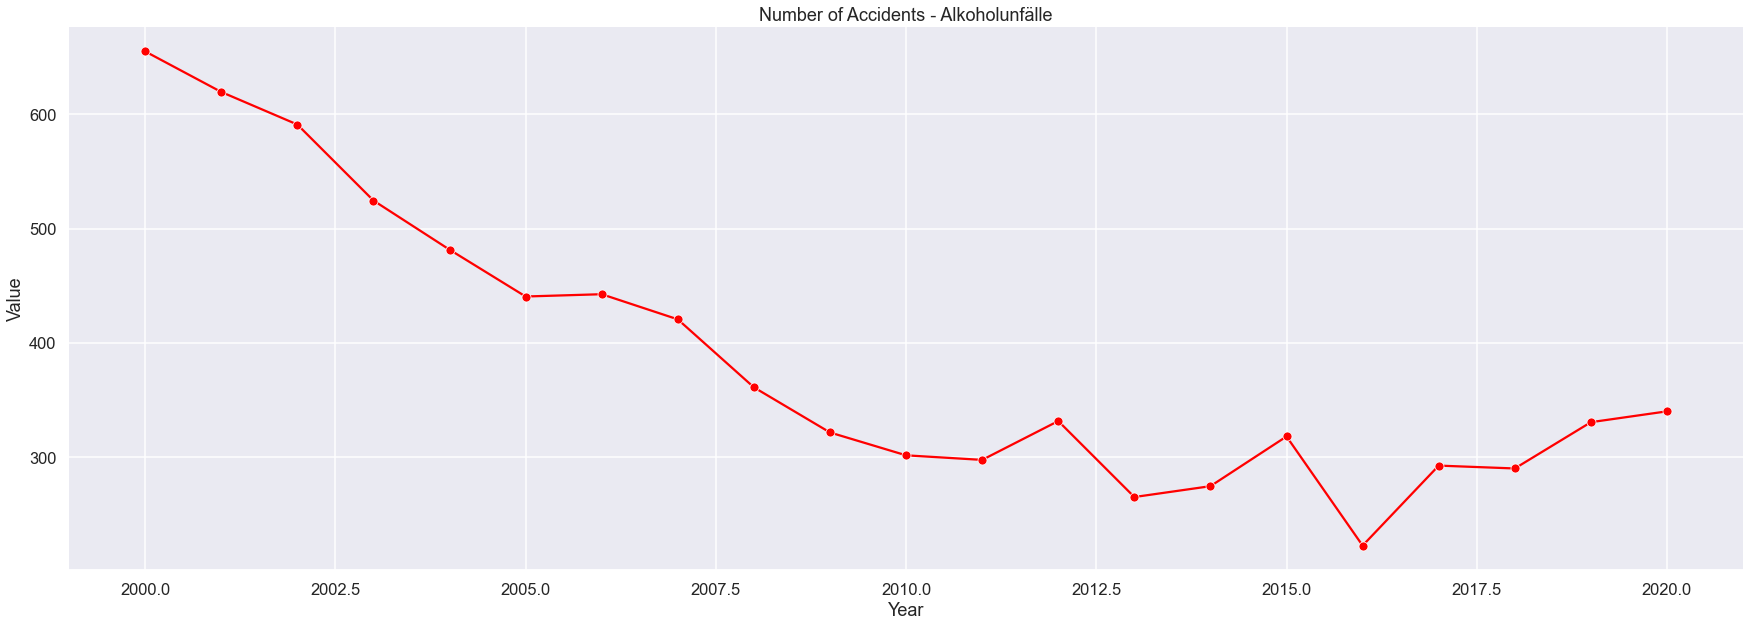

In [77]:
# Tracer une courbe avec des options de personnalisation
plt.figure(figsize=(30,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Alkoholunfälle, color="red", ci=None, markers=True, marker='o')

# Ajouter un titre et des étiquettes d'axes
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Alkoholunfälle")
plt.xlabel("Year")
plt.ylabel("Value")


# Afficher la courbe
plt.show()


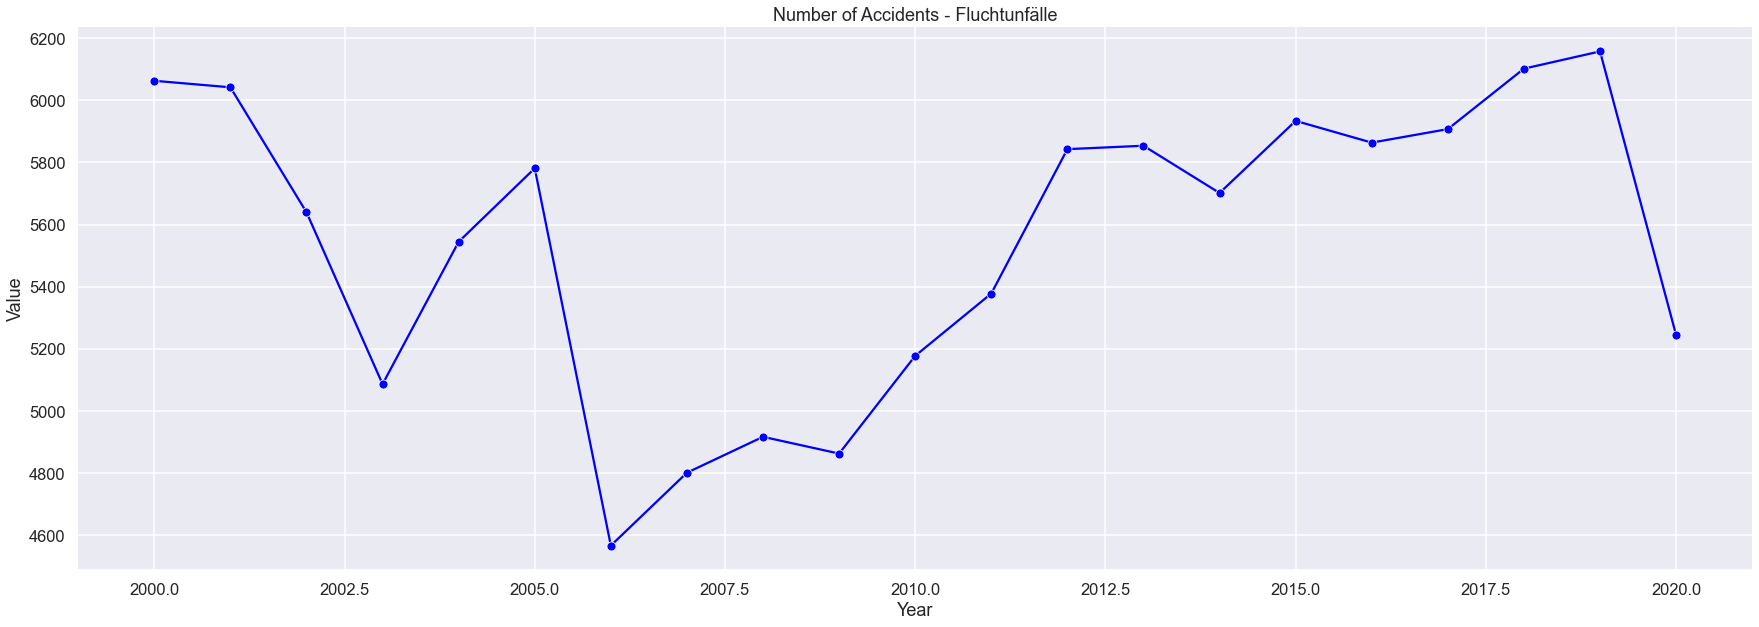

In [79]:
# Tracer une courbe avec des options de personnalisation
plt.figure(figsize=(30,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Fluchtunfälle, color="blue", ci=None, markers=True, marker='o')

# Ajouter un titre et des étiquettes d'axes
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Fluchtunfälle")
plt.xlabel("Year")
plt.ylabel("Value")


# Afficher la courbe
plt.show()

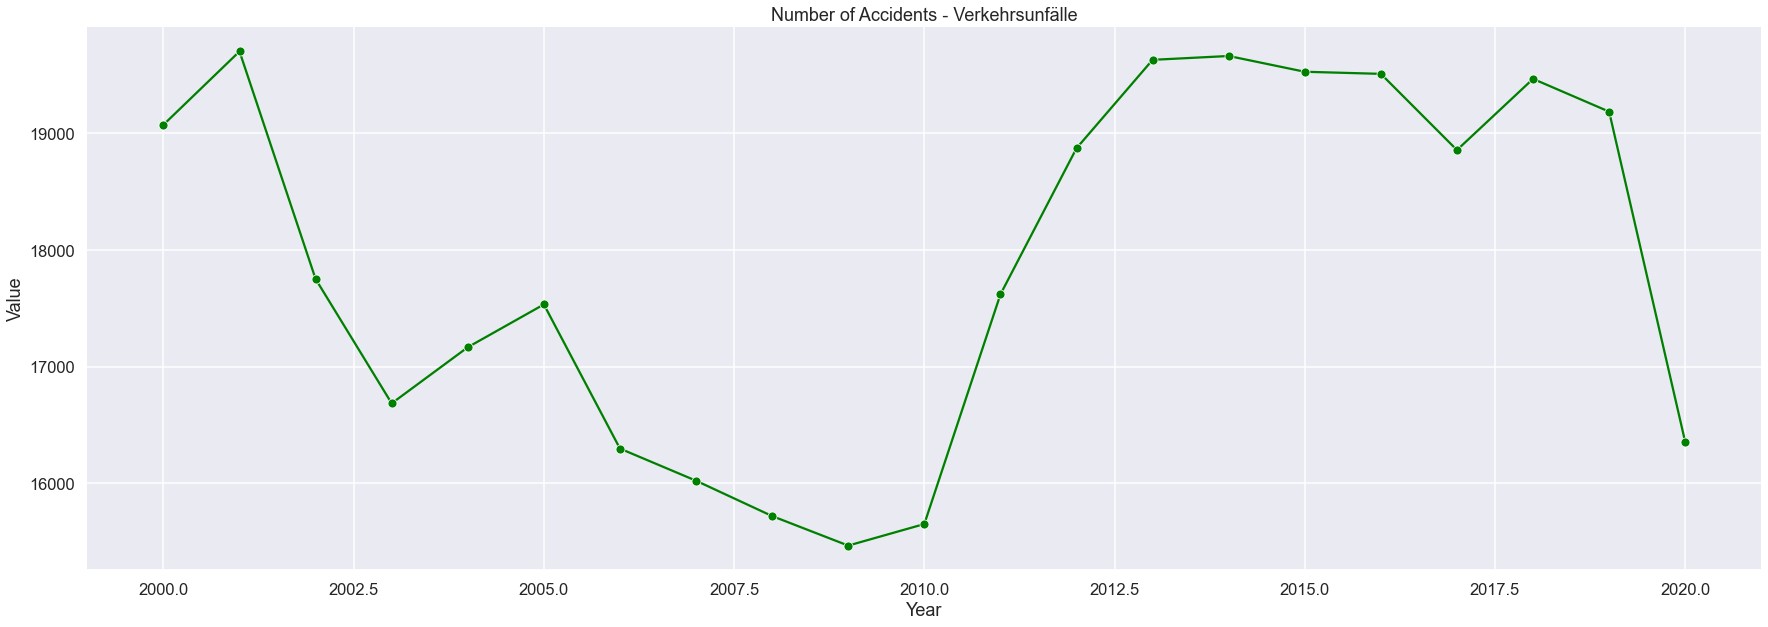

In [80]:
# Tracer une courbe avec des options de personnalisation
plt.figure(figsize=(30,10))
sns.lineplot(x="Year", y="Value", data=Accidents_Verkehrsunfälle, color="green", ci=None, markers=True, marker='o')

# Ajouter un titre et des étiquettes d'axes
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Number of Accidents - Verkehrsunfälle")
plt.xlabel("Year")
plt.ylabel("Value")


# Afficher la courbe
plt.show()

In [81]:
Data_Frame_2020 = Data_Frame_2020.drop(Data_Frame_2020[Data_Frame['Month'] == 'Summe'].index)
Data_Frame_2020

<ipython-input-81-ba957b7eab3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_Frame_2020 = Data_Frame_2020.drop(Data_Frame_2020[Data_Frame['Month'] == 'Summe'].index)


Category           Accident_Type  Year   Month   Value
26     Alkoholunfälle               insgesamt  2020  202001    28.0
27     Alkoholunfälle               insgesamt  2020  202002    40.0
28     Alkoholunfälle               insgesamt  2020  202003    27.0
29     Alkoholunfälle               insgesamt  2020  202004    26.0
30     Alkoholunfälle               insgesamt  2020  202005    40.0
31     Alkoholunfälle               insgesamt  2020  202006    49.0
32     Alkoholunfälle               insgesamt  2020  202007    58.0
33     Alkoholunfälle               insgesamt  2020  202008    46.0
34     Alkoholunfälle               insgesamt  2020  202009    46.0
35     Alkoholunfälle               insgesamt  2020  202010    34.0
36     Alkoholunfälle               insgesamt  2020  202011    23.0
37     Alkoholunfälle               insgesamt  2020  202012    13.0
39     Alkoholunfälle               insgesamt  2019  201901    22.0
40     Alkoholunfälle               insgesamt  2019  201902    28.0
41     Alkoholunfälle               insgesamt  2019  201903    34.0
42     Alkoholunfälle               insgesamt  2019  201904    36.0
43     Alkoholunfälle               insgesamt  2019  201905    39.0
44     Alkoholunfälle               insgesamt  2019  201906    40.0
45     Alkoholunfälle               insgesamt  2019  201907    48.0
46     Alkoholunfälle               insgesamt  2019  201908    31.0
47     Alkoholunfälle               insgesamt  2019  201909    47.0
48     Alkoholunfälle               insgesamt  2019  201910    45.0
49     Alkoholunfälle               insgesamt  2019  201911    29.0
50     Alkoholunfälle               insgesamt  2019  201912    35.0
52     Alkoholunfälle               insgesamt  2018  201801    22.0
53     Alkoholunfälle               insgesamt  2018  201802    24.0
54     Alkoholunfälle               insgesamt  2018  201803    32.0
55     Alkoholunfälle               insgesamt  2018  201804    25.0
56     Alkoholunfälle               insgesamt  2018  201805    34.0
57     Alkoholunfälle               insgesamt  2018  201806    39.0
58     Alkoholunfälle               insgesamt  2018  201807    51.0
59     Alkoholunfälle               insgesamt  2018  201808    40.0
60     Alkoholunfälle               insgesamt  2018  201809    36.0
61     Alkoholunfälle               insgesamt  2018  201810    43.0
62     Alkoholunfälle               insgesamt  2018  201811    31.0
63     Alkoholunfälle               insgesamt  2018  201812    21.0
65     Alkoholunfälle               insgesamt  2017  201701    19.0
66     Alkoholunfälle               insgesamt  2017  201702    22.0
67     Alkoholunfälle               insgesamt  2017  201703    36.0
68     Alkoholunfälle               insgesamt  2017  201704    26.0
69     Alkoholunfälle               insgesamt  2017  201705    29.0
70     Alkoholunfälle               insgesamt  2017  201706    41.0
71     Alkoholunfälle               insgesamt  2017  201707    52.0
72     Alkoholunfälle               insgesamt  2017  201708    30.0
73     Alkoholunfälle               insgesamt  2017  201709    47.0
74     Alkoholunfälle               insgesamt  2017  201710    32.0
75     Alkoholunfälle               insgesamt  2017  201711    33.0
76     Alkoholunfälle               insgesamt  2017  201712    42.0
78     Alkoholunfälle               insgesamt  2016  201601    21.0
79     Alkoholunfälle               insgesamt  2016  201602    10.0
80     Alkoholunfälle               insgesamt  2016  201603    20.0
81     Alkoholunfälle               insgesamt  2016  201604    27.0
82     Alkoholunfälle               insgesamt  2016  201605    25.0
83     Alkoholunfälle               insgesamt  2016  201606    30.0
84     Alkoholunfälle               insgesamt  2016  201607    35.0
85     Alkoholunfälle               insgesamt  2016  201608    34.0
86     Alkoholunfälle               insgesamt  2016  201609    29.0
87     Alkoholunfälle               insgesamt  2016  201610    30.0
8

In [88]:
Y = Data_Frame_2020['Value']
Y

26        28.0
27        40.0
28        27.0
29        26.0
30        40.0
31        49.0
32        58.0
33        46.0
34        46.0
35        34.0
36        23.0
37        13.0
39        22.0
40        28.0
41        34.0
42        36.0
43        39.0
44        40.0
45        48.0
46        31.0
47        47.0
48        45.0
49        29.0
50        35.0
52        22.0
53        24.0
54        32.0
55        25.0
56        34.0
57        39.0
58        51.0
59        40.0
60        36.0
61        43.0
62        31.0
63        21.0
65        19.0
66        22.0
67        36.0
68        26.0
69        29.0
70        41.0
71        52.0
72        30.0
73        47.0
74        32.0
75        33.0
76        42.0
78        21.0
79        10.0
80        20.0
81        27.0
82        25.0
83        30.0
84        35.0
85        34.0
86        29.0
87        30.0
88        20.0
89        20.0
91        22.0
92        23.0
93        23.0
94        29.0
95        50.0
96        39.0
97        

In [112]:
X = Data_Frame_2020.drop('Value', axis=1)
X['Month']=X['Month'].apply(lambda x: x[-2:])
X

Category           Accident_Type  Year Month
26     Alkoholunfälle               insgesamt  2020    01
27     Alkoholunfälle               insgesamt  2020    02
28     Alkoholunfälle               insgesamt  2020    03
29     Alkoholunfälle               insgesamt  2020    04
30     Alkoholunfälle               insgesamt  2020    05
31     Alkoholunfälle               insgesamt  2020    06
32     Alkoholunfälle               insgesamt  2020    07
33     Alkoholunfälle               insgesamt  2020    08
34     Alkoholunfälle               insgesamt  2020    09
35     Alkoholunfälle               insgesamt  2020    10
36     Alkoholunfälle               insgesamt  2020    11
37     Alkoholunfälle               insgesamt  2020    12
39     Alkoholunfälle               insgesamt  2019    01
40     Alkoholunfälle               insgesamt  2019    02
41     Alkoholunfälle               insgesamt  2019    03
42     Alkoholunfälle               insgesamt  2019    04
43     Alkoholunfälle               insgesamt  2019    05
44     Alkoholunfälle               insgesamt  2019    06
45     Alkoholunfälle               insgesamt  2019    07
46     Alkoholunfälle               insgesamt  2019    08
47     Alkoholunfälle               insgesamt  2019    09
48     Alkoholunfälle               insgesamt  2019    10
49     Alkoholunfälle               insgesamt  2019    11
50     Alkoholunfälle               insgesamt  2019    12
52     Alkoholunfälle               insgesamt  2018    01
53     Alkoholunfälle               insgesamt  2018    02
54     Alkoholunfälle               insgesamt  2018    03
55     Alkoholunfälle               insgesamt  2018    04
56     Alkoholunfälle               insgesamt  2018    05
57     Alkoholunfälle               insgesamt  2018    06
58     Alkoholunfälle               insgesamt  2018    07
59     Alkoholunfälle               insgesamt  2018    08
60     Alkoholunfälle               insgesamt  2018    09
61     Alkoholunfälle               insgesamt  2018    10
62     Alkoholunfälle               insgesamt  2018    11
63     Alkoholunfälle               insgesamt  2018    12
65     Alkoholunfälle               insgesamt  2017    01
66     Alkoholunfälle               insgesamt  2017    02
67     Alkoholunfälle               insgesamt  2017    03
68     Alkoholunfälle               insgesamt  2017    04
69     Alkoholunfälle               insgesamt  2017    05
70     Alkoholunfälle               insgesamt  2017    06
71     Alkoholunfälle               insgesamt  2017    07
72     Alkoholunfälle               insgesamt  2017    08
73     Alkoholunfälle               insgesamt  2017    09
74     Alkoholunfälle               insgesamt  2017    10
75     Alkoholunfälle               insgesamt  2017    11
76     Alkoholunfälle               insgesamt  2017    12
78     Alkoholunfälle               insgesamt  2016    01
79     Alkoholunfälle               insgesamt  2016    02
80     Alkoholunfälle               insgesamt  2016    03
81     Alkoholunfälle               insgesamt  2016    04
82     Alkoholunfälle               insgesamt  2016    05
83     Alkoholunfälle               insgesamt  2016    06
84     Alkoholunfälle               insgesamt  2016    07
85     Alkoholunfälle               insgesamt  2016    08
86     Alkoholunfälle               insgesamt  2016    09
87     Alkoholunfälle               insgesamt  2016    10
88     Alkoholunfälle               insgesamt  2016    11
89     Alkoholunfälle               insgesamt  2016    12
91     Alkoholunfälle               insgesamt  2015    01
92     Alkoholunfälle               insgesamt  2015    02
93     Alkoholunfälle               insgesamt  2015    03
94     Alkoholunfälle               insgesamt  2015    04
95     Alkoholunfälle               insgesamt  2015    05
96     Alkoholunfälle               insgesamt  2015    06
97     Alkoholunfälle               insgesamt  2015    07
98     Alkoholunfälle               insgesamt  2015    08
99     Alko

In [113]:
X_dummies = pd.get_dummies(X)
X_dummies

Year  Category_Alkoholunfälle  Category_Fluchtunfälle  \
26    2020                        1                       0   
27    2020                        1                       0   
28    2020                        1                       0   
29    2020                        1                       0   
30    2020                        1                       0   
31    2020                        1                       0   
32    2020                        1                       0   
33    2020                        1                       0   
34    2020                        1                       0   
35    2020                        1                       0   
36    2020                        1                       0   
37    2020                        1                       0   
39    2019                        1                       0   
40    2019                        1                       0   
41    2019                        1                       0   
42    2019                        1                       0   
43    2019                        1                       0   
44    2019                        1                       0   
45    2019                        1                       0   
46    2019                        1                       0   
47    2019                        1                       0   
48    2019                        1                       0   
49    2019                        1                       0   
50    2019                        1                       0   
52    2018                        1                       0   
53    2018                        1                       0   
54    2018                        1                       0   
55    2018                        1                       0   
56    2018                        1                       0   
57    2018                        1                       0   
58    2018                        1                       0   
59    2018                        1                       0   
60    2018                        1                       0   
61    2018                        1                       0   
62    2018                        1                       0   
63    2018                        1                       0   
65    2017                        1                       0   
66    2017                        1                       0   
67    2017                        1                       0   
68    2017                        1                       0   
69    2017                        1                       0   
70    2017                        1                       0   
71    2017                        1                       0   
72    2017                        1                       0   
73    2017                        1                       0   
74    2017                        1                       0   
75    2017                        1                       0   
76    2017                        1                       0   
78    2016                        1                       0   
79    2016                        1                       0   
80    2016                        1                       0   
81    2016                        1                       0   
82    2016                        1                       0   
83    2016                        1                       0   
84    2016                        1                       0   
85    2016                        1                       0   
86    2016                        1                       0   
87    2016                        1                       0   
88    2016                        1                       0   
89    2016                        1                       0   
91    2015                        1                       0   
92    2015                        1                       0   
93    2015                        1  

In [114]:
dummies_columns = X_dummies.columns
dummies_columns

Index(['Year', 'Category_Alkoholunfälle', 'Category_Fluchtunfälle',
       'Category_Verkehrsunfälle', 'Accident_Type_Verletzte und Getötete',
       'Accident_Type_insgesamt', 'Accident_Type_mit Personenschäden',
       'Month_01', 'Month_02', 'Month_03', 'Month_04', 'Month_05', 'Month_06',
       'Month_07', 'Month_08', 'Month_09', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, Y, test_size=0.25, random_state=42)

In [116]:
X_train

Year  Category_Alkoholunfälle  Category_Fluchtunfälle  \
1981  2008                        0                       0   
953   2018                        0                       1   
2050  2002                        0                       0   
746   2011                        0                       1   
1252  2018                        0                       0   
1441  2003                        0                       0   
1060  2010                        0                       1   
1147  2003                        0                       1   
262   2002                        1                       0   
1531  2019                        0                       0   
360   2018                        1                       0   
669   2017                        0                       1   
1682  2008                        0                       0   
1725  2004                        0                       0   
442   2011                        1                       0   
741   2011                        0                       1   
677   2016                        0                       1   
1409  2006                        0                       0   
850   2003                        0                       1   
1724  2004                        0                       0   
1935  2011                        0                       0   
1868  2016                        0                       0   
1015  2013                        0                       1   
1473  2001                        0                       0   
1307  2014                        0                       0   
1919  2012                        0                       0   
947   2018                        0                       1   
1489  2000                        0                       0   
589   2000                        1                       0   
1190  2000                        0                       1   
1783  2000                        0                       0   
735   2012                        0                       1   
367   2017                        1                       0   
1456  2002                        0                       0   
1191  2000                        0                       1   
1960  2009                        0                       0   
809   2006                        0                       1   
1479  2000                        0                       0   
1249  2018                        0                       0   
966   2017                        0                       1   
1383  2008                        0                       0   
351   2018                        1                       0   
1624  2012                        0                       0   
1936  2011                        0                       0   
438   2012                        1                       0   
1694  2007                        0                       0   
281   2001                        1                       0   
1156  2002                        0                       1   
976   2016                        0                       1   
1738  2003                        0                       0   
2015  2005                        0                       0   
587   2000                        1                       0   
1444  2003                        0                       0   
1564  2017                        0                       0   
251   2003                        1                       0   
1283  2015                        0                       0   
1639  2011                        0                       0   
1253  2018                        0                       0   
585   2000                        1                       0   
88    2016                        1                       0   
655   2018                        0                       1   
1850  2018                        0                       0   
744   2011                        0  

In [117]:
X_test

Year  Category_Alkoholunfälle  Category_Fluchtunfälle  \
1325  2012                        0                       0   
255   2003                        1                       0   
2044  2003                        0                       0   
1820  2020                        0                       0   
1555  2017                        0                       0   
929   2020                        0                       1   
2018  2005                        0                       0   
649   2018                        0                       1   
1397  2007                        0                       0   
538   2004                        1                       0   
1962  2009                        0                       0   
421   2013                        1                       0   
974   2016                        0                       1   
1046  2011                        0                       1   
1529  2019                        0                       0   
284   2001                        1                       0   
683   2016                        0                       1   
2045  2003                        0                       0   
297   2000                        1                       0   
96    2015                        1                       0   
1615  2013                        0                       0   
264   2002                        1                       0   
1033  2012                        0                       1   
245   2004                        1                       0   
1330  2012                        0                       0   
728   2012                        0                       1   
101   2015                        1                       0   
423   2013                        1                       0   
1880  2015                        0                       0   
1937  2011                        0                       0   
1406  2006                        0                       0   
1916  2013                        0                       0   
672   2017                        0                       1   
1119  2005                        0                       1   
399   2015                        1                       0   
144   2011                        1                       0   
890   2000                        0                       1   
57    2018                        1                       0   
1116  2005                        0                       1   
515   2006                        1                       0   
1382  2008                        0                       0   
293   2000                        1                       0   
1920  2012                        0                       0   
1521  2020                        0                       0   
1618  2013                        0                       0   
150   2011                        1                       0   
2072  2001                        0                       0   
1699  2006                        0                       0   
2028  2004                        0                       0   
498   2007                        1                       0   
1647  2010                        0                       0   
553   2003                        1                       0   
791   2007                        0                       1   
1883  2015                        0                       0   
1561  2017                        0                       0   
806   2006                        0                       1   
1592  2015                        0                       0   
456   2010                        1                       0   
1629  2012                        0                       0   
1393  2007                        0                       0   
1542  2018                        0                       0   
50    2019                        1                       0   
1094  2007                        0  

In [118]:
regr = RandomForestRegressor(max_depth=None, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [119]:
r_squared = regr.score(X_test, y_test)
Param = regr.get_params()
print('Coefficient de détermination R² :', r_squared)

Coefficient de détermination R² : 0.990704951268239


In [183]:
joblib.dump(regr, 'regression_model_saved.joblib')

['regression_model_saved.joblib']

In [156]:
first_input = ['Alkoholunfälle', 'Verletzte und Getötete', '2021', '01']

Category = 'Category_' + first_input[0]
Accident_Type = 'Accident_Type_' + first_input[1]
Year = int(first_input[2])
Month = 'Month_' + first_input[3]

vector_input = []
vector_input.append(Year)
vector_input.append(Category)
vector_input.append(Accident_Type)
vector_input.append(Month)
vector_input

[2021,
 'Category_Alkoholunfälle',
 'Accident_Type_Verletzte und Getötete',
 'Month_01']

In [157]:
value_input = []
for col in dummies_columns:
    if col in vector_input:
        value_input.append(1)
    else:
        value_input.append(0)
        
value_input[0]=vector_input[0]
value_input

[2021, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [158]:
df = pd.DataFrame(columns=dummies_columns)
df.loc[len(df)] = value_input
df

Year Category_Alkoholunfälle Category_Fluchtunfälle  \
0  2021                       1                      0   

  Category_Verkehrsunfälle Accident_Type_Verletzte und Getötete  \
0                        0                                    1   

  Accident_Type_insgesamt Accident_Type_mit Personenschäden Month_01 Month_02  \
0                       0                                 0        1        0   

  Month_03 Month_04 Month_05 Month_06 Month_07 Month_08 Month_09 Month_10  \
0        0        0        0        0        0        0        0        0   

  Month_11 Month_12  
0        0        0

In [159]:
y_pred_test = regr.predict(df)
y_pred_test = y_pred_test.astype(int)
y_pred_test[0]

9

In [160]:
Data_Frame_2021 = Data_Frame[Data_Frame['Year'] == 2021]
Data_Frame_2021 = Data_Frame_2021.drop(Data_Frame_2021[Data_Frame['Month'] == 'Summe'].index)
Data_Frame_2021['Month'] = Data_Frame_2021['Month'].apply(lambda x: x[-2:])
Data_Frame_2021

<ipython-input-160-bccf45eb0596>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Data_Frame_2021 = Data_Frame_2021.drop(Data_Frame_2021[Data_Frame['Month'] == 'Summe'].index)


Category           Accident_Type  Year Month   Value
13     Alkoholunfälle               insgesamt  2021    01    16.0
14     Alkoholunfälle               insgesamt  2021    02    14.0
15     Alkoholunfälle               insgesamt  2021    03    24.0
16     Alkoholunfälle               insgesamt  2021    04    16.0
17     Alkoholunfälle               insgesamt  2021    05    24.0
18     Alkoholunfälle               insgesamt  2021    06    48.0
19     Alkoholunfälle               insgesamt  2021    07    44.0
20     Alkoholunfälle               insgesamt  2021    08    46.0
21     Alkoholunfälle               insgesamt  2021    09    54.0
22     Alkoholunfälle               insgesamt  2021    10    43.0
23     Alkoholunfälle               insgesamt  2021    11    33.0
24     Alkoholunfälle               insgesamt  2021    12    21.0
311    Alkoholunfälle  Verletzte und Getötete  2021    01     5.0
312    Alkoholunfälle  Verletzte und Getötete  2021    02     9.0
313    Alkoholunfälle  Verletzte und Getötete  2021    03     6.0
314    Alkoholunfälle  Verletzte und Getötete  2021    04     6.0
315    Alkoholunfälle  Verletzte und Getötete  2021    05    13.0
316    Alkoholunfälle  Verletzte und Getötete  2021    06    39.0
317    Alkoholunfälle  Verletzte und Getötete  2021    07    27.0
318    Alkoholunfälle  Verletzte und Getötete  2021    08    24.0
319    Alkoholunfälle  Verletzte und Getötete  2021    09    36.0
320    Alkoholunfälle  Verletzte und Getötete  2021    10    27.0
321    Alkoholunfälle  Verletzte und Getötete  2021    11    15.0
322    Alkoholunfälle  Verletzte und Getötete  2021    12     7.0
609     Fluchtunfälle               insgesamt  2021    01   521.0
610     Fluchtunfälle               insgesamt  2021    02   602.0
611     Fluchtunfälle               insgesamt  2021    03   801.0
612     Fluchtunfälle               insgesamt  2021    04   716.0
613     Fluchtunfälle               insgesamt  2021    05   865.0
614     Fluchtunfälle               insgesamt  2021    06   991.0
615     Fluchtunfälle               insgesamt  2021    07  1027.0
616     Fluchtunfälle               insgesamt  2021    08   715.0
617     Fluchtunfälle               insgesamt  2021    09   951.0
618     Fluchtunfälle               insgesamt  2021    10  1053.0
619     Fluchtunfälle               insgesamt  2021    11   849.0
620     Fluchtunfälle               insgesamt  2021    12   788.0
907     Fluchtunfälle  Verletzte und Getötete  2021    01     8.0
908     Fluchtunfälle  Verletzte und Getötete  2021    02    31.0
909     Fluchtunfälle  Verletzte und Getötete  2021    03    30.0
910     Fluchtunfälle  Verletzte und Getötete  2021    04    40.0
911     Fluchtunfälle  Verletzte und Getötete  2021    05    45.0
912     Fluchtunfälle  Verletzte und Getötete  2021    06    82.0
913     Fluchtunfälle  Verletzte und Getötete  2021    07    77.0
914     Fluchtunfälle  Verletzte und Getötete  2021    08    41.0
915     Fluchtunfälle  Verletzte und Getötete  2021    09    78.0
916     Fluchtunfälle  Verletzte und Getötete  2021    10    52.0
917     Fluchtunfälle  Verletzte und Getötete  2021    11    55.0
918     Fluchtunfälle  Verletzte und Getötete  2021    12    17.0
1205  Verkehrsunfälle               insgesamt  2021    01  2153.0
1206  Verkehrsunfälle               insgesamt  2021    02  2253.0
1207  Verkehrsunfälle               insgesamt  2021    03  3135.0
1208  Verkehrsunfälle               insgesamt  2021    04  2904.0
1209  Verkehrsunfälle               insgesamt  2021    05  3197.0
1210  Verkehrsunfälle               insgesamt  2021    06  3791.0
1211  Verkehrsunfälle               insgesamt  2021    07  3908.0
1212  Verkehrsunfälle               insgesamt  2021    08  2857.0
1213  Verkehrsunfälle               insgesamt  2021    09  3651.0
1214  Verkehrsunfälle               insgesamt  2021    10  3861.0
1215  Verkehrsunfälle               insgesamt  2021    11  3308.0
1216  Verkehrsunfälle               insgesamt  2021  

In [161]:
lignes = Data_Frame_2021.values.tolist()

# Affichage de la liste des lignes
print(lignes[0])

['Alkoholunfälle', 'insgesamt', 2021, '01', 16.0]


In [163]:
predicted_value = []
for first_input in lignes :
    Category = 'Category_' + first_input[0]
    Accident_Type = 'Accident_Type_' + first_input[1]
    Year = int(first_input[2])
    Month = 'Month_' + first_input[3]

    vector_input = []
    vector_input.append(Year)
    vector_input.append(Category)
    vector_input.append(Accident_Type)
    vector_input.append(Month)
    
    value_input = []
    for col in dummies_columns:
        if col in vector_input:
            value_input.append(1)
        else:
            value_input.append(0)
        
    value_input[0]=vector_input[0]
    
    df = pd.DataFrame(columns=dummies_columns)
    df.loc[len(df)] = value_input
    y_pred_test = regr.predict(df)
    y_pred_test = y_pred_test.astype(int)
    predicted_value.append(y_pred_test[0])
    
    print(first_input[0], first_input[1], first_input[2], first_input[3], first_input[4], y_pred_test[0])

Alkoholunfälle insgesamt 2021 01 16.0 25
Alkoholunfälle insgesamt 2021 02 14.0 34
Alkoholunfälle insgesamt 2021 03 24.0 29
Alkoholunfälle insgesamt 2021 04 16.0 27
Alkoholunfälle insgesamt 2021 05 24.0 38
Alkoholunfälle insgesamt 2021 06 48.0 44
Alkoholunfälle insgesamt 2021 07 44.0 54
Alkoholunfälle insgesamt 2021 08 46.0 41
Alkoholunfälle insgesamt 2021 09 54.0 45
Alkoholunfälle insgesamt 2021 10 43.0 35
Alkoholunfälle insgesamt 2021 11 33.0 26
Alkoholunfälle insgesamt 2021 12 21.0 18
Alkoholunfälle Verletzte und Getötete 2021 01 5.0 9
Alkoholunfälle Verletzte und Getötete 2021 02 9.0 16
Alkoholunfälle Verletzte und Getötete 2021 03 6.0 13
Alkoholunfälle Verletzte und Getötete 2021 04 6.0 16
Alkoholunfälle Verletzte und Getötete 2021 05 13.0 24
Alkoholunfälle Verletzte und Getötete 2021 06 39.0 27
Alkoholunfälle Verletzte und Getötete 2021 07 27.0 37
Alkoholunfälle Verletzte und Getötete 2021 08 24.0 19
Alkoholunfälle Verletzte und Getötete 2021 09 36.0 23
Alkoholunfälle Verletzte un

In [167]:
Data_Frame_2021 = Data_Frame_2021.assign(Predicted_value=predicted_value)
Data_Frame_2021

Category           Accident_Type  Year Month   Value  \
13     Alkoholunfälle               insgesamt  2021    01    16.0   
14     Alkoholunfälle               insgesamt  2021    02    14.0   
15     Alkoholunfälle               insgesamt  2021    03    24.0   
16     Alkoholunfälle               insgesamt  2021    04    16.0   
17     Alkoholunfälle               insgesamt  2021    05    24.0   
18     Alkoholunfälle               insgesamt  2021    06    48.0   
19     Alkoholunfälle               insgesamt  2021    07    44.0   
20     Alkoholunfälle               insgesamt  2021    08    46.0   
21     Alkoholunfälle               insgesamt  2021    09    54.0   
22     Alkoholunfälle               insgesamt  2021    10    43.0   
23     Alkoholunfälle               insgesamt  2021    11    33.0   
24     Alkoholunfälle               insgesamt  2021    12    21.0   
311    Alkoholunfälle  Verletzte und Getötete  2021    01     5.0   
312    Alkoholunfälle  Verletzte und Getötete  2021    02     9.0   
313    Alkoholunfälle  Verletzte und Getötete  2021    03     6.0   
314    Alkoholunfälle  Verletzte und Getötete  2021    04     6.0   
315    Alkoholunfälle  Verletzte und Getötete  2021    05    13.0   
316    Alkoholunfälle  Verletzte und Getötete  2021    06    39.0   
317    Alkoholunfälle  Verletzte und Getötete  2021    07    27.0   
318    Alkoholunfälle  Verletzte und Getötete  2021    08    24.0   
319    Alkoholunfälle  Verletzte und Getötete  2021    09    36.0   
320    Alkoholunfälle  Verletzte und Getötete  2021    10    27.0   
321    Alkoholunfälle  Verletzte und Getötete  2021    11    15.0   
322    Alkoholunfälle  Verletzte und Getötete  2021    12     7.0   
609     Fluchtunfälle               insgesamt  2021    01   521.0   
610     Fluchtunfälle               insgesamt  2021    02   602.0   
611     Fluchtunfälle               insgesamt  2021    03   801.0   
612     Fluchtunfälle               insgesamt  2021    04   716.0   
613     Fluchtunfälle               insgesamt  2021    05   865.0   
614     Fluchtunfälle               insgesamt  2021    06   991.0   
615     Fluchtunfälle               insgesamt  2021    07  1027.0   
616     Fluchtunfälle               insgesamt  2021    08   715.0   
617     Fluchtunfälle               insgesamt  2021    09   951.0   
618     Fluchtunfälle               insgesamt  2021    10  1053.0   
619     Fluchtunfälle               insgesamt  2021    11   849.0   
620     Fluchtunfälle               insgesamt  2021    12   788.0   
907     Fluchtunfälle  Verletzte und Getötete  2021    01     8.0   
908     Fluchtunfälle  Verletzte und Getötete  2021    02    31.0   
909     Fluchtunfälle  Verletzte und Getötete  2021    03    30.0   
910     Fluchtunfälle  Verletzte und Getötete  2021    04    40.0   
911     Fluchtunfälle  Verletzte und Getötete  2021    05    45.0   
912     Fluchtunfälle  Verletzte und Getötete  2021    06    82.0   
913     Fluchtunfälle  Verletzte und Getötete  2021    07    77.0   
914     Fluchtunfälle  Verletzte und Getötete  2021    08    41.0   
915     Fluchtunfälle  Verletzte und Getötete  2021    09    78.0   
916     Fluchtunfälle  Verletzte und Getötete  2021    10    52.0   
917     Fluchtunfälle  Verletzte und Getötete  2021    11    55.0   
918     Fluchtunfälle  Verletzte und Getötete  2021    12    17.0   
1205  Verkehrsunfälle               insgesamt  2021    01  2153.0   
1206  Verkehrsunfälle               insgesamt  2021    02  2253.0   
1207  Verkehrsunfälle               insgesamt  2021    03  3135.0   
1208  Verkehrsunfälle               insgesamt  2021    04  2904.0   
1209  Verkehrsunfälle               insgesamt  2021    05  3197.0   
1210  Verkehrsunfälle               insgesamt  2021    06  3791.0   
1211  Verkehrsunfälle               insgesamt  2021    07  3908.0   
1212  Verkehrsunfälle               insgesamt  2021    08  2857.0   
1213  Verkehrsunfälle               insgesamt  2021    09  3651.0   
1214  Verke

In [170]:
Data_Frame_2021['Diff'] = Data_Frame_2021.apply(lambda row: row.Value - row.Predicted_value, axis=1)
Data_Frame_2021

Category           Accident_Type  Year Month   Value  \
13     Alkoholunfälle               insgesamt  2021    01    16.0   
14     Alkoholunfälle               insgesamt  2021    02    14.0   
15     Alkoholunfälle               insgesamt  2021    03    24.0   
16     Alkoholunfälle               insgesamt  2021    04    16.0   
17     Alkoholunfälle               insgesamt  2021    05    24.0   
18     Alkoholunfälle               insgesamt  2021    06    48.0   
19     Alkoholunfälle               insgesamt  2021    07    44.0   
20     Alkoholunfälle               insgesamt  2021    08    46.0   
21     Alkoholunfälle               insgesamt  2021    09    54.0   
22     Alkoholunfälle               insgesamt  2021    10    43.0   
23     Alkoholunfälle               insgesamt  2021    11    33.0   
24     Alkoholunfälle               insgesamt  2021    12    21.0   
311    Alkoholunfälle  Verletzte und Getötete  2021    01     5.0   
312    Alkoholunfälle  Verletzte und Getötete  2021    02     9.0   
313    Alkoholunfälle  Verletzte und Getötete  2021    03     6.0   
314    Alkoholunfälle  Verletzte und Getötete  2021    04     6.0   
315    Alkoholunfälle  Verletzte und Getötete  2021    05    13.0   
316    Alkoholunfälle  Verletzte und Getötete  2021    06    39.0   
317    Alkoholunfälle  Verletzte und Getötete  2021    07    27.0   
318    Alkoholunfälle  Verletzte und Getötete  2021    08    24.0   
319    Alkoholunfälle  Verletzte und Getötete  2021    09    36.0   
320    Alkoholunfälle  Verletzte und Getötete  2021    10    27.0   
321    Alkoholunfälle  Verletzte und Getötete  2021    11    15.0   
322    Alkoholunfälle  Verletzte und Getötete  2021    12     7.0   
609     Fluchtunfälle               insgesamt  2021    01   521.0   
610     Fluchtunfälle               insgesamt  2021    02   602.0   
611     Fluchtunfälle               insgesamt  2021    03   801.0   
612     Fluchtunfälle               insgesamt  2021    04   716.0   
613     Fluchtunfälle               insgesamt  2021    05   865.0   
614     Fluchtunfälle               insgesamt  2021    06   991.0   
615     Fluchtunfälle               insgesamt  2021    07  1027.0   
616     Fluchtunfälle               insgesamt  2021    08   715.0   
617     Fluchtunfälle               insgesamt  2021    09   951.0   
618     Fluchtunfälle               insgesamt  2021    10  1053.0   
619     Fluchtunfälle               insgesamt  2021    11   849.0   
620     Fluchtunfälle               insgesamt  2021    12   788.0   
907     Fluchtunfälle  Verletzte und Getötete  2021    01     8.0   
908     Fluchtunfälle  Verletzte und Getötete  2021    02    31.0   
909     Fluchtunfälle  Verletzte und Getötete  2021    03    30.0   
910     Fluchtunfälle  Verletzte und Getötete  2021    04    40.0   
911     Fluchtunfälle  Verletzte und Getötete  2021    05    45.0   
912     Fluchtunfälle  Verletzte und Getötete  2021    06    82.0   
913     Fluchtunfälle  Verletzte und Getötete  2021    07    77.0   
914     Fluchtunfälle  Verletzte und Getötete  2021    08    41.0   
915     Fluchtunfälle  Verletzte und Getötete  2021    09    78.0   
916     Fluchtunfälle  Verletzte und Getötete  2021    10    52.0   
917     Fluchtunfälle  Verletzte und Getötete  2021    11    55.0   
918     Fluchtunfälle  Verletzte und Getötete  2021    12    17.0   
1205  Verkehrsunfälle               insgesamt  2021    01  2153.0   
1206  Verkehrsunfälle               insgesamt  2021    02  2253.0   
1207  Verkehrsunfälle               insgesamt  2021    03  3135.0   
1208  Verkehrsunfälle               insgesamt  2021    04  2904.0   
1209  Verkehrsunfälle               insgesamt  2021    05  3197.0   
1210  Verkehrsunfälle               insgesamt  2021    06  3791.0   
1211  Verkehrsunfälle               insgesamt  2021    07  3908.0   
1212  Verkehrsunfälle               insgesamt  2021    08  2857.0   
1213  Verkehrsunfälle               insgesamt  2021    09  3651.0   
1214  Verke

In [171]:
Alkoholunfälle_2021 = Data_Frame_2021[Data_Frame_2021['Category'] == 'Alkoholunfälle']
Fluchtunfälle_2021 = Data_Frame_2021[Data_Frame_2021['Category'] == 'Fluchtunfälle']
Verkehrsunfälle_2021 = Data_Frame_2021[Data_Frame_2021['Category'] == 'Verkehrsunfälle']


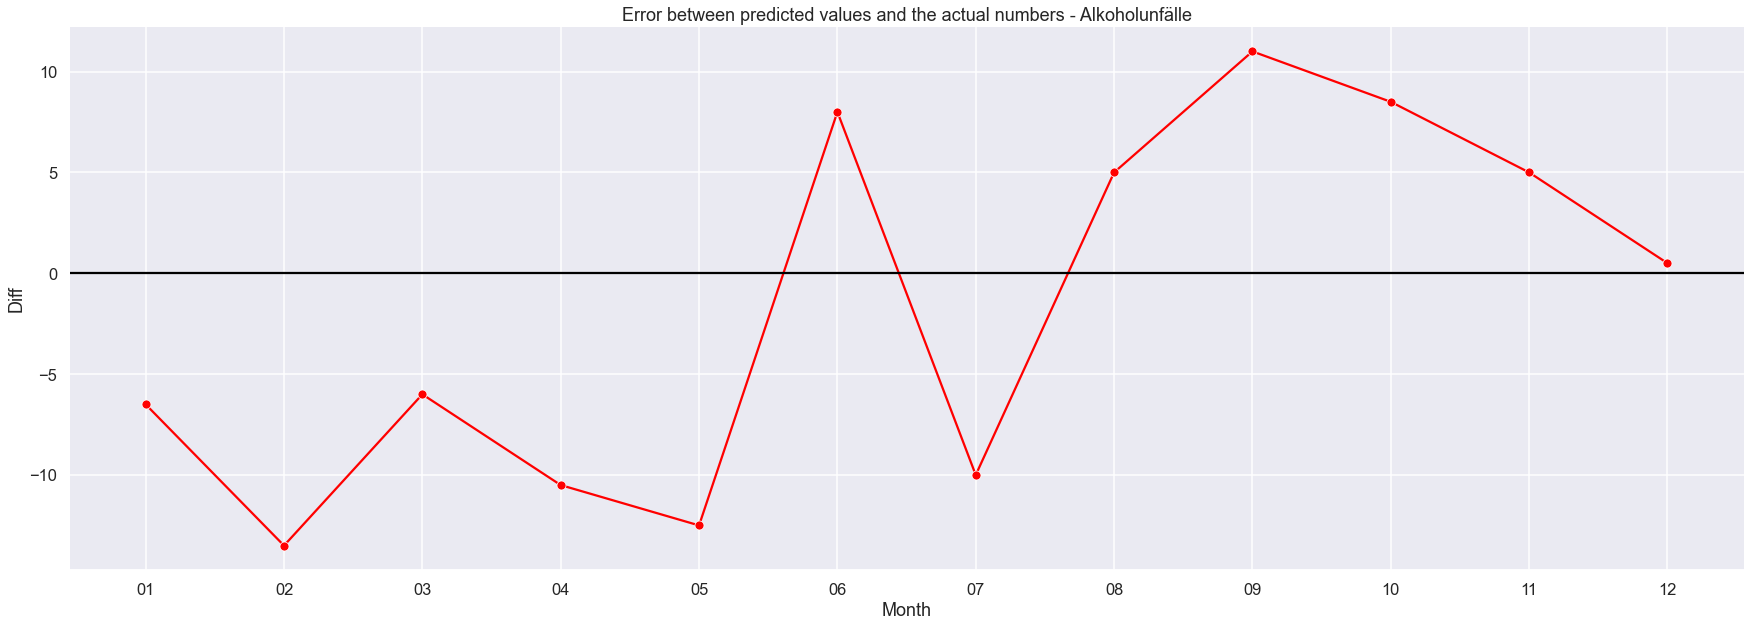

In [179]:
# Tracer une courbe avec des options de personnalisation
plt.figure(figsize=(30,10))
sns.lineplot(x="Month", y="Diff", data=Alkoholunfälle_2021, color="red", ci=None, markers=True, marker='o')

# Ajouter un titre et des étiquettes d'axes
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Error between predicted values and the actual numbers - Alkoholunfälle")
plt.xlabel("Month")
plt.ylabel("Diff")

plt.axhline(y=0, color='black', linestyle='-')

# Afficher la courbe
plt.show()

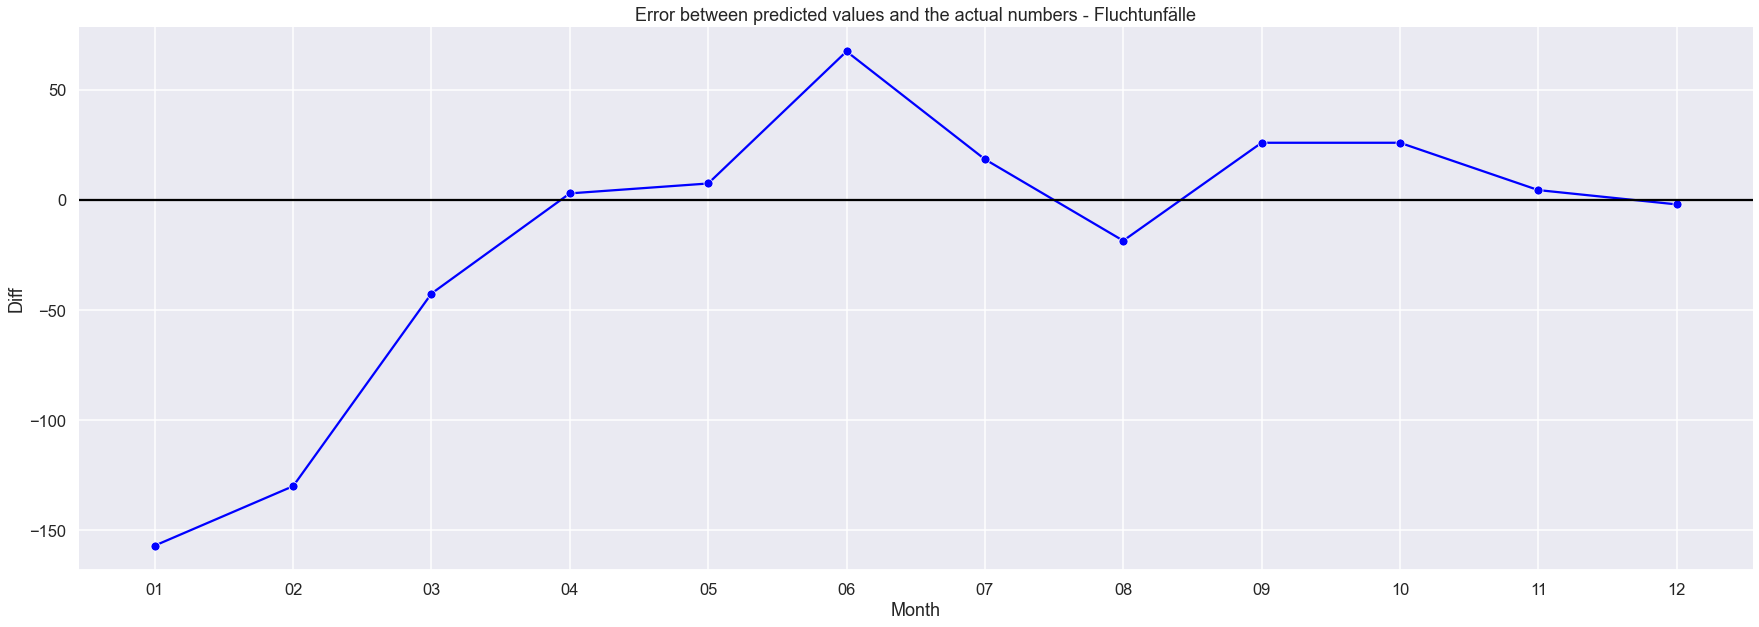

In [180]:
# Tracer une courbe avec des options de personnalisation
plt.figure(figsize=(30,10))
sns.lineplot(x="Month", y="Diff", data=Fluchtunfälle_2021, color="blue", ci=None, markers=True, marker='o')

# Ajouter un titre et des étiquettes d'axes
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Error between predicted values and the actual numbers - Fluchtunfälle")
plt.xlabel("Month")
plt.ylabel("Diff")

plt.axhline(y=0, color='black', linestyle='-')

# Afficher la courbe
plt.show()

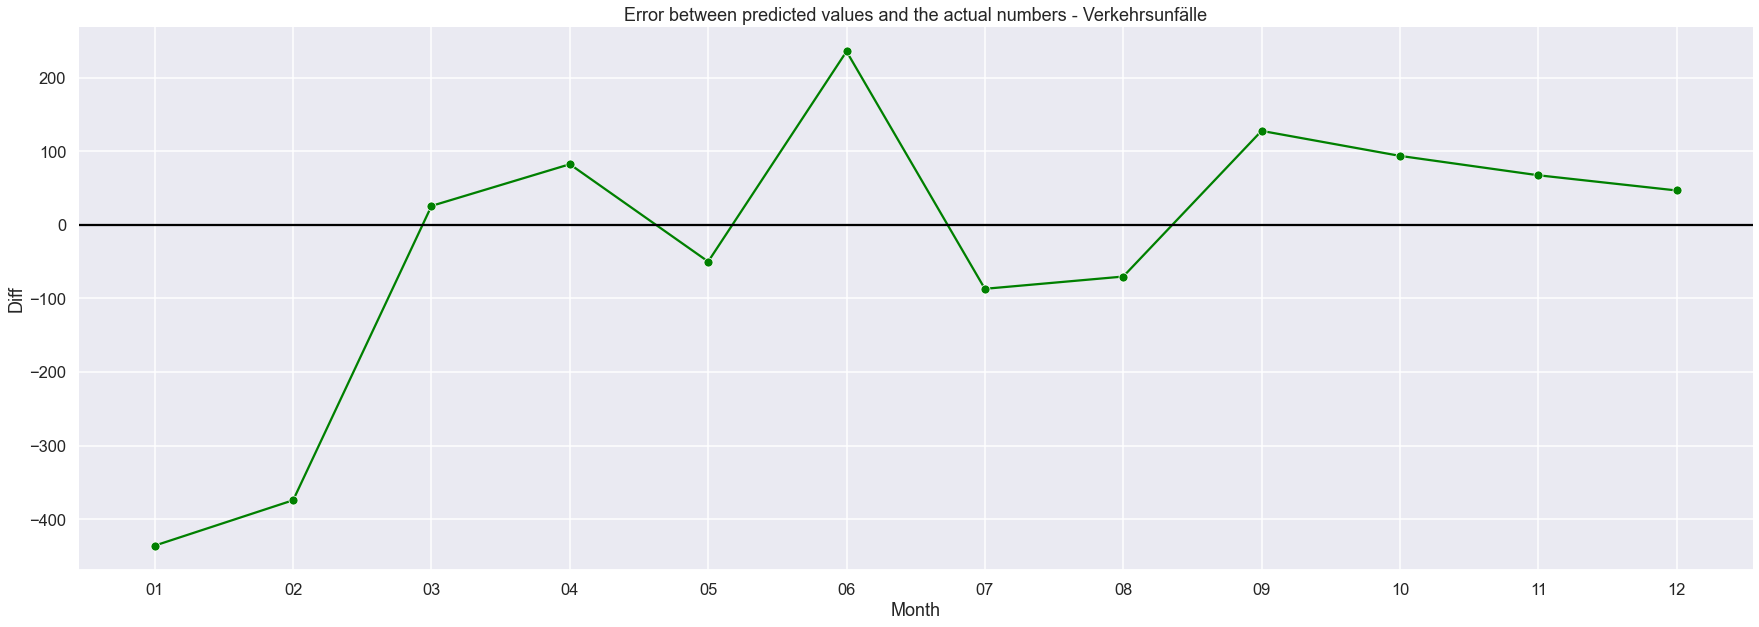

In [181]:
# Tracer une courbe avec des options de personnalisation
plt.figure(figsize=(30,10))
sns.lineplot(x="Month", y="Diff", data=Verkehrsunfälle_2021, color="green", ci=None, markers=True, marker='o')

# Ajouter un titre et des étiquettes d'axes
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("Dark2")
sns.despine(left=True)
plt.title("Error between predicted values and the actual numbers - Verkehrsunfälle")
plt.xlabel("Month")
plt.ylabel("Diff")

plt.axhline(y=0, color='black', linestyle='-')

# Afficher la courbe
plt.show()